In [307]:
import pandas as pd

df = pd.read_csv("bcHouse2019.csv", encoding="latin")
df.to_csv("BC2019.csv", encoding='utf-8', index=False) #convert back to utf-8 encoding
df = pd.read_csv("BC2019.csv", encoding="utf-8")
df["Date"] = pd.to_datetime(df["Date"])
df.head()

,Date,Type,Ask,Sold,DOM,sqft,Floors,Strata_Fee,Build_Year
0,2019-01-25,1B1W,279900,267000,51,507,3,191,2008
1,2019-01-28,1B1W,279000,270000,38,441,1,206,2008
2,2019-03-19,1B1W,286500,286500,10,447,2,206,2007
3,2019-03-29,1B1W,349900,349900,1,606,3,211,2008
4,2019-04-02,1B1W,349600,342200,11,556,2,261,2007


In [276]:
first = df.set_index("Date")
first.head()

,Type,Ask,Sold,DOM,sqft,Floors,Strata_Fee,Build_Year
Date,,,,,,,,
2019-01-25,1B1W,279900,267000,51,507,3,191,2008
2019-01-28,1B1W,279000,270000,38,441,1,206,2008
2019-03-19,1B1W,286500,286500,10,447,2,206,2007
2019-03-29,1B1W,349900,349900,1,606,3,211,2008
2019-04-02,1B1W,349600,342200,11,556,2,261,2007


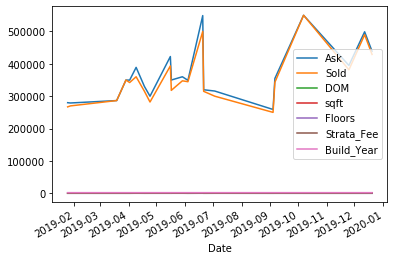

In [277]:
first.plot()

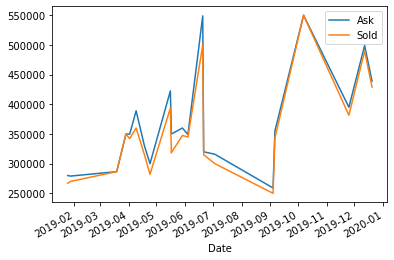

In [278]:
first[["Ask","Sold"]].plot()

In [279]:
df.head()

,Date,Type,Ask,Sold,DOM,sqft,Floors,Strata_Fee,Build_Year
0,2019-01-25,1B1W,279900,267000,51,507,3,191,2008
1,2019-01-28,1B1W,279000,270000,38,441,1,206,2008
2,2019-03-19,1B1W,286500,286500,10,447,2,206,2007
3,2019-03-29,1B1W,349900,349900,1,606,3,211,2008
4,2019-04-02,1B1W,349600,342200,11,556,2,261,2007


In [280]:
df["Type"].unique()

array(['1B1W', '1B2W', '2B2B', '2B1W'], dtype=object)

In [281]:
for name,group in df.groupby("Type"):
    print (name)

1B1W
1B2W
2B1W
2B2B


In [282]:
ask_sell = pd.DataFrame()

for name, group in df.groupby("Type"):
    if ask_sell.empty and "1B1W" in name:
        ask_sell = group.set_index("Date")[["Ask"]].rename(columns={"Ask":"ask_"+ name})
        ask_sell = ask_sell.join(group.set_index("Date")[["Sold"]].rename(columns={"Sold":"sold_"+ name}))

ask_sell

,ask_1B1W,sold_1B1W
Date,,
2019-01-25,279900,267000
2019-01-28,279000,270000
2019-03-19,286500,286500
2019-03-29,349900,349900
2019-04-02,349600,342200
2019-04-09,389000,360000
2019-04-18,329900,315000
2019-04-24,299900,282000
2019-05-17,349900,318000


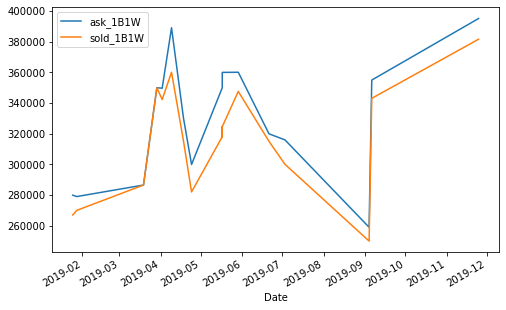

In [283]:
ask_sell.plot(figsize=(8, 5), legend=True)

(737091.0, 737394.0)

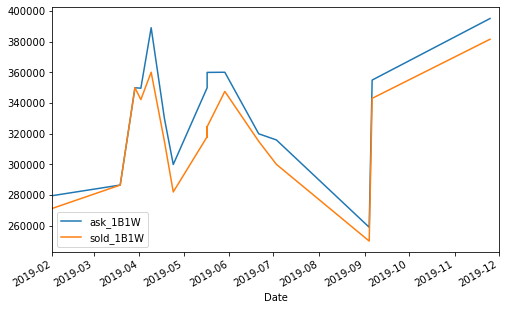

In [284]:
clear_asksell = ask_sell.dropna().plot(figsize=(8, 5), legend=True)
clear_asksell.set_xlim(pd.Timestamp("2019-02"), pd.Timestamp("2019-12"))

In [285]:
ask_sell.describe()

,ask_1B1W,sold_1B1W
count,18.000000,18.000000
mean,332666.666667,316366.666667
std,38888.467972,35222.385930
min,259000.000000,250000.000000
25%,303900.000000,289875.000000
50%,349750.000000,318000.000000
75%,358650.000000,342800.000000
max,395000.000000,381500.000000


In [308]:
onebb = df[df["Type"] == "1B1W"]
onebb.head()

,Date,Type,Ask,Sold,DOM,sqft,Floors,Strata_Fee,Build_Year
0,2019-01-25,1B1W,279900,267000,51,507,3,191,2008
1,2019-01-28,1B1W,279000,270000,38,441,1,206,2008
2,2019-03-19,1B1W,286500,286500,10,447,2,206,2007
3,2019-03-29,1B1W,349900,349900,1,606,3,211,2008
4,2019-04-02,1B1W,349600,342200,11,556,2,261,2007


In [297]:
onebb_corr = onebb.corr()
onebb_corr

,Ask,Sold,DOM,sqft,Floors,Strata_Fee,Build_Year
Ask,1.000000,0.967812,0.343956,0.845174,0.527760,0.477031,0.518136
Sold,0.967812,1.000000,0.181546,0.835640,0.457204,0.468437,0.509937
DOM,0.343956,0.181546,1.000000,0.147165,0.624339,0.199907,-0.098435
sqft,0.845174,0.835640,0.147165,1.000000,0.365521,0.433273,0.710430
Floors,0.527760,0.457204,0.624339,0.365521,1.000000,-0.053928,0.054832
Strata_Fee,0.477031,0.468437,0.199907,0.433273,-0.053928,1.000000,0.249814
Build_Year,0.518136,0.509937,-0.098435,0.710430,0.054832,0.249814,1.000000


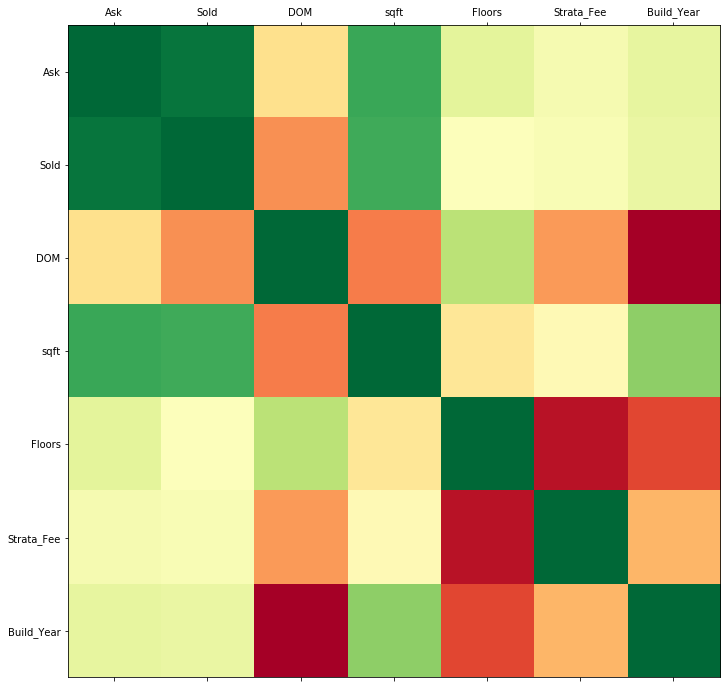

In [306]:
import matplotlib.pyplot as plt
import numpy as np

labels = onebb_corr.columns
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(111)
ax.matshow(onebb_corr, cmap = plt.cm.RdYlGn)

ax.set_xticks(np.arange(len(labels)))
ax.set_yticks(np.arange(len(labels)))
ax.set_xticklabels(labels)
ax.set_yticklabels(labels)

plt.show()